In [ ]:
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [45]:
dataset = pd.read_csv("datasets\labelled.csv")

In [46]:
dataset.shape

(11583, 4)

In [47]:
dataset['Category'].value_counts()

Category
Entertainment    1587
Business         1494
Politics         1452
Judiciary        1393
Crime            1211
Culture          1034
Sports            974
Science           948
International     897
Technology        593
Name: count, dtype: int64

In [48]:
target_category = dataset['Category'].unique()
print(target_category)

['Judiciary' 'Crime' 'Politics' 'Science' 'Entertainment' 'Sports'
 'Culture' 'International' 'Business' 'Technology']


In [49]:
dataset['CategoryId'] = dataset['Category'].factorize()[0]
dataset.head()

,Heading,Body,Category,URL,CategoryId
0,free speech not hate speech madras high court ...,madras high court issue significant remark ami...,Judiciary,https://www.indiatoday.in/law/high-courts/stor...,0
1,comment take context say us cop mock indian st...,seattle police officer guild friday come defen...,Crime,https://www.indiatoday.in/world/story/indian-s...,1
2,first meeting one nation one election committe...,first official meeting one nation one election...,Politics,https://www.indiatoday.in/india/story/one-nati...,2
3,us airlines flight depressurize midair plummet...,united airlines jet head rome turn around less...,Crime,https://www.indiatoday.in/world/story/us-fligh...,1
4,terrorist kill security force foil infiltratio...,three terrorist kill infiltration bid foil sec...,Crime,https://www.indiatoday.in/india/story/one-terr...,1


In [50]:
category = dataset[['Category', 'CategoryId']].drop_duplicates().sort_values('CategoryId')
print(category)

         Category  CategoryId
0       Judiciary           0
1           Crime           1
2        Politics           2
8         Science           3
11  Entertainment           4
12         Sports           5
15        Culture           6
16  International           7
30       Business           8
77     Technology           9


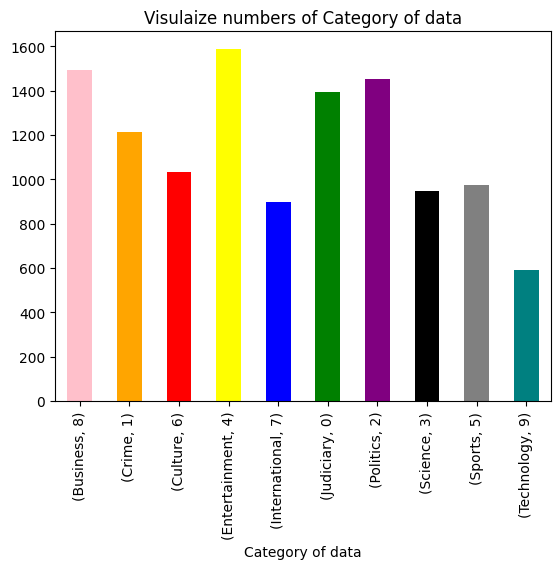

In [51]:
dataset.groupby('Category').CategoryId.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue", "green", "purple", "black", "gray", "teal"])
plt.xlabel("Category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

In [52]:
text = dataset["Body"]
text.head(10)

0    madras high court issue significant remark ami...
1    seattle police officer guild friday come defen...
2    first official meeting one nation one election...
3    united airlines jet head rome turn around less...
4    three terrorist kill infiltration bid foil sec...
5    enforcement directorate ed likely summon top b...
6    loud explosion hear drone press service pinpoi...
7    bid republican presidential nomination vivek r...
8    keralas kozhikode report another confirm case ...
9    couple rajasthans jaipur catch camera kissing ...
Name: Body, dtype: object

In [53]:
category = dataset['Category']
category.head(10)

0    Judiciary
1        Crime
2     Politics
3        Crime
4        Crime
5    Judiciary
6        Crime
7    Judiciary
8      Science
9        Crime
Name: Category, dtype: object

In [56]:
def remove_tags(text):
    remove = re.compile(r'')
    return re.sub(remove, '', text)
dataset['Body'] = dataset['Body'].apply(remove_tags)

In [57]:
def special_char(text):
    reviews = ''
    for x in text:
        if x.isalnum():
            reviews = reviews + x
        else:
            reviews = reviews + ' '
    return reviews
dataset['Body'] = dataset['Body'].apply(special_char)

In [58]:
def convert_lower(text):
    return text.lower()
dataset['Body'] = dataset['Body'].apply(convert_lower)
dataset['Body'][1]

'seattle police officer guild friday come defence official find make insensitive comment death indian student jaahnavi kandula early year say viral video police action share medium fail explain full story contextkandula student washingtons northeastern university strike officer kevin dave pedestrian crossing night january drive speed kmh way report drug overdose callin bodycam footage release monday seattle police department officer daniel auderer laugh deadly crash dismiss implication dave might fault criminal investigation necessaryin video auderer hear say yeah write cheque usd anyway limit valuethe video capture one side conversation much detail nuance not make public yet seattle police officer guild say statement also release letter write officer auderer latter say intend comment mockery lawyersus cop defend selfin letter date august office police accountability auderer say laugh ridiculousness incident litigate ridiculousness watch incident play two party bargain tragedyat time b

In [59]:
import nltk
nltk.download('punkt_tab')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [x for x in words if x not in stop_words]
dataset['Body'] = dataset['Body'].apply(remove_stopwords)
dataset['Body'][1]

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\prish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['seattle',
 'police',
 'officer',
 'guild',
 'friday',
 'come',
 'defence',
 'official',
 'find',
 'make',
 'insensitive',
 'comment',
 'death',
 'indian',
 'student',
 'jaahnavi',
 'kandula',
 'early',
 'year',
 'say',
 'viral',
 'video',
 'police',
 'action',
 'share',
 'medium',
 'fail',
 'explain',
 'full',
 'story',
 'contextkandula',
 'student',
 'washingtons',
 'northeastern',
 'university',
 'strike',
 'officer',
 'kevin',
 'dave',
 'pedestrian',
 'crossing',
 'night',
 'january',
 'drive',
 'speed',
 'kmh',
 'way',
 'report',
 'drug',
 'overdose',
 'callin',
 'bodycam',
 'footage',
 'release',
 'monday',
 'seattle',
 'police',
 'department',
 'officer',
 'daniel',
 'auderer',
 'laugh',
 'deadly',
 'crash',
 'dismiss',
 'implication',
 'dave',
 'might',
 'fault',
 'criminal',
 'investigation',
 'necessaryin',
 'video',
 'auderer',
 'hear',
 'say',
 'yeah',
 'write',
 'cheque',
 'usd',
 'anyway',
 'limit',
 'valuethe',
 'video',
 'capture',
 'one',
 'side',
 'conversation',
 'm

In [60]:
def lemmatize_word(text):
    wordnet = WordNetLemmatizer()
    return " ".join([wordnet.lemmatize(word) for word in text])
dataset['Body'] = dataset['Body'].apply(lemmatize_word)
dataset['Body'][1]

'seattle police officer guild friday come defence official find make insensitive comment death indian student jaahnavi kandula early year say viral video police action share medium fail explain full story contextkandula student washington northeastern university strike officer kevin dave pedestrian crossing night january drive speed kmh way report drug overdose callin bodycam footage release monday seattle police department officer daniel auderer laugh deadly crash dismiss implication dave might fault criminal investigation necessaryin video auderer hear say yeah write cheque usd anyway limit valuethe video capture one side conversation much detail nuance make public yet seattle police officer guild say statement also release letter write officer auderer latter say intend comment mockery lawyersus cop defend selfin letter date august office police accountability auderer say laugh ridiculousness incident litigate ridiculousness watch incident play two party bargain tragedyat time believ

In [61]:
dataset

,Heading,Body,Category,URL,CategoryId
0,free speech not hate speech madras high court ...,madras high court issue significant remark ami...,Judiciary,https://www.indiatoday.in/law/high-courts/stor...,0
1,comment take context say us cop mock indian st...,seattle police officer guild friday come defen...,Crime,https://www.indiatoday.in/world/story/indian-s...,1
2,first meeting one nation one election committe...,first official meeting one nation one election...,Politics,https://www.indiatoday.in/india/story/one-nati...,2
3,us airlines flight depressurize midair plummet...,united airline jet head rome turn around less ...,Crime,https://www.indiatoday.in/world/story/us-fligh...,1
4,terrorist kill security force foil infiltratio...,three terrorist kill infiltration bid foil sec...,Crime,https://www.indiatoday.in/india/story/one-terr...,1
...,...,...,...,...,...
11578,constitutional statutory right vote status con...,new delhi paradoxical right vote assign status...,Politics,https://theprint.in/theprint-essential/constit...,2
11579,face north korea threat deploy missile defence...,u thaad system missile range km reach height k...,International,https://theprint.in/defence/facing-north-korea...,7
11580,rs poll victory may not change ahmed patel ten...,despite somewhat smooth work relationship rahu...,Politics,https://theprint.in/theprint-primer/rs-poll-vi...,2
11581,gm mustard walk ominous footstep bt brinjal,centre tell supreme court would take decision ...,Sports,https://theprint.in/theprint-primer/gm-mustard...,5


In [62]:
x = dataset['Body']
y = dataset['CategoryId']

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(dataset.iloc[:,0].values)
y = np.array(dataset.CategoryId.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(dataset.Body).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (11583, 5000)
y.shape =  (11583,)


In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

8108
3475


In [65]:
# Create list of model and accuracy dicts
perform_list = [ ]

In [66]:
def run_model(model_name, est_c, est_pnlty):
    mdl = ""
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)
    elif model_name == 'Support Vector Classifer':
        mdl = SVC()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)
    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')
    print(f'F1-score : {f1score}')
    # Add performance parameters to list
    perform_list.append(dict([('Model', model_name),('Test Accuracy', round(accuracy, 2)),('Precision', round(precision, 2)),('Recall', round(recall, 2)),('F1', round(f1score, 2))]))

In [67]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Logistic Regression: % 71.83
Precision : 0.718273381294964
Recall : 0.718273381294964
F1-score : 0.718273381294964


In [39]:
run_model('Random Forest', est_c=None, est_pnlty=None)


Test Accuracy Score of Basic Random Forest: % 75.74
Precision : 0.757410071942446
Recall : 0.757410071942446
F1-score : 0.757410071942446


In [40]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 73.21
Precision : 0.7320863309352518
Recall : 0.7320863309352518
F1-score : 0.7320863309352518


In [41]:
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Support Vector Classifer: % 74.76
Precision : 0.7476258992805755
Recall : 0.7476258992805755
F1-score : 0.7476258992805755


In [42]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 53.06
Precision : 0.5306474820143885
Recall : 0.5306474820143885
F1-score : 0.5306474820143885


In [ ]:
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

In [ ]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

In [ ]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

In [ ]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value,"from Random")

In [ ]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)